<a href="https://colab.research.google.com/github/bindusri-c/Heart-disease-prediction-/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import accuracy_score


In [ ]:
data=pd.read_csv('heart.csv')
data.shape

(303, 14)

### **Preprocessing and vizualization**

In [ ]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Dictionary of unique values for each column
unique_values = {col: data[col].unique() for col in columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")

Unique values in sex: [1 0]
Unique values in cp: [3 2 1 0]
Unique values in fbs: [1 0]
Unique values in restecg: [0 1 2]
Unique values in exang: [0 1]
Unique values in slope: [0 2 1]
Unique values in ca: [0 2 1 3 4]
Unique values in thal: [1 2 3 0]
Unique values in target: [1 0]


<Axes: >

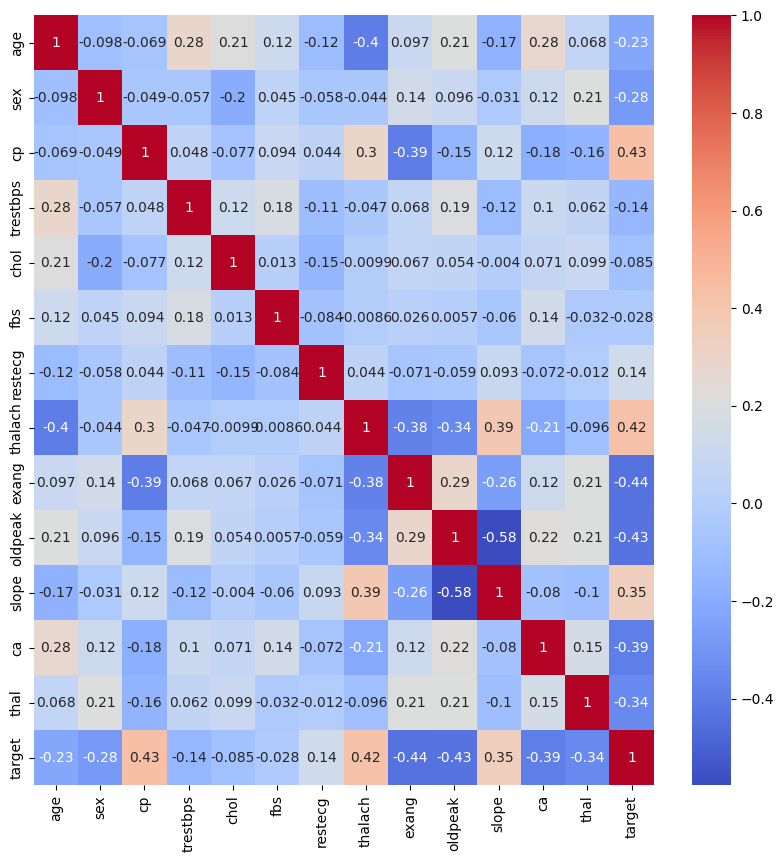

In [ ]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
data.corr()['target']

,target
age,-0.225439
sex,-0.280937
cp,0.433798
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalach,0.421741
exang,-0.436757
oldpeak,-0.430696


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


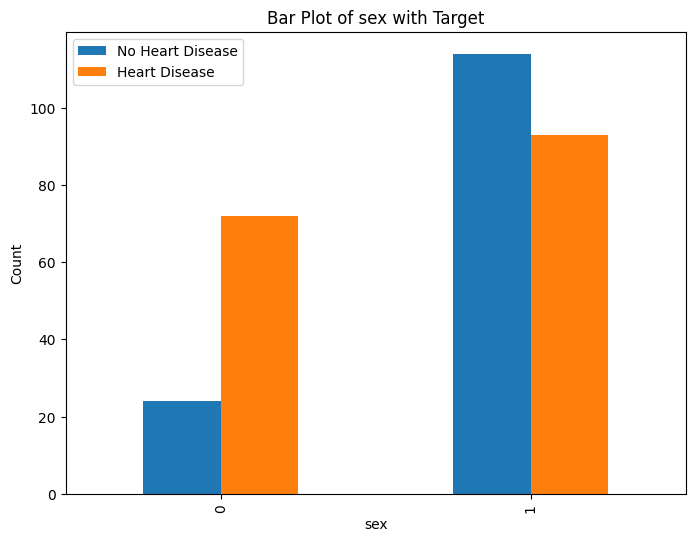

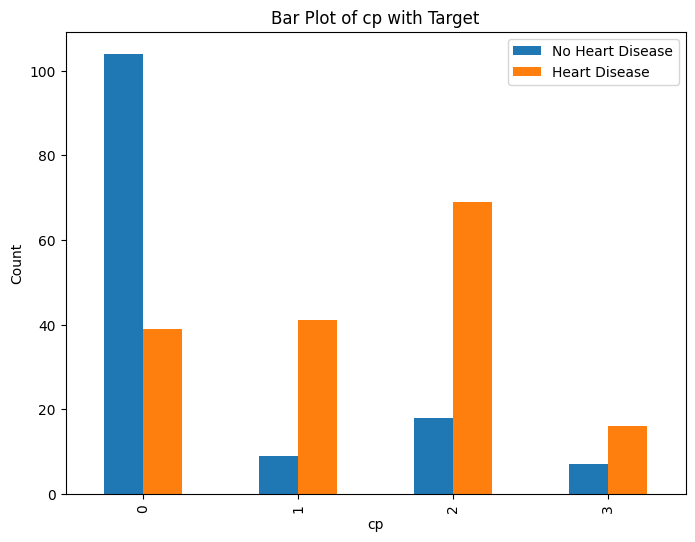

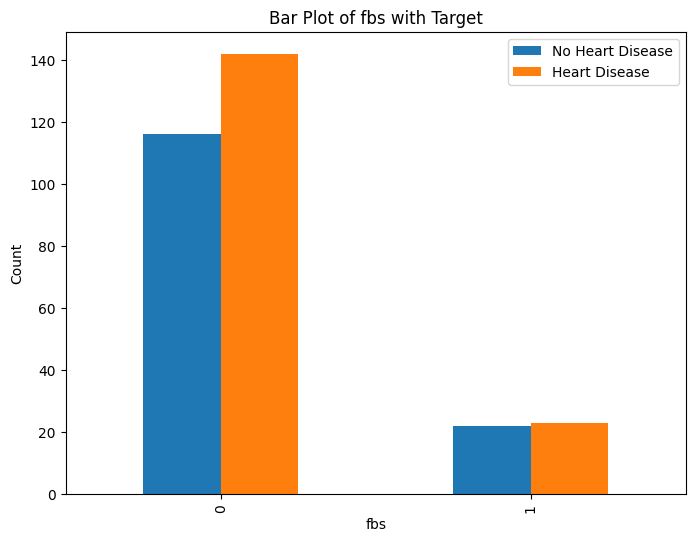

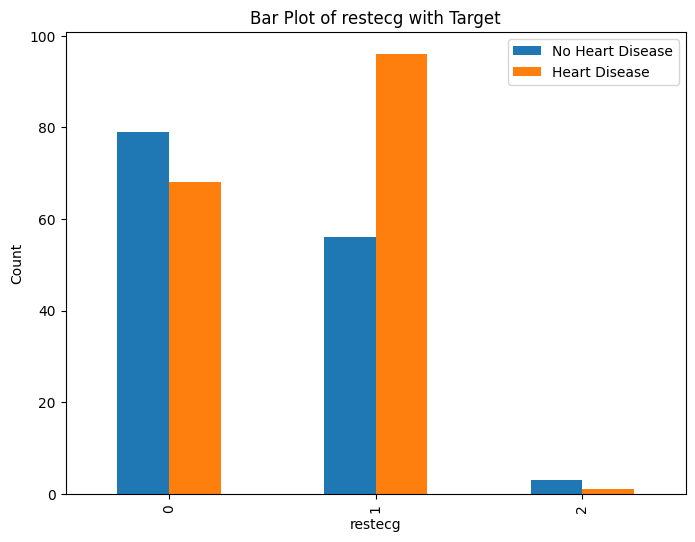

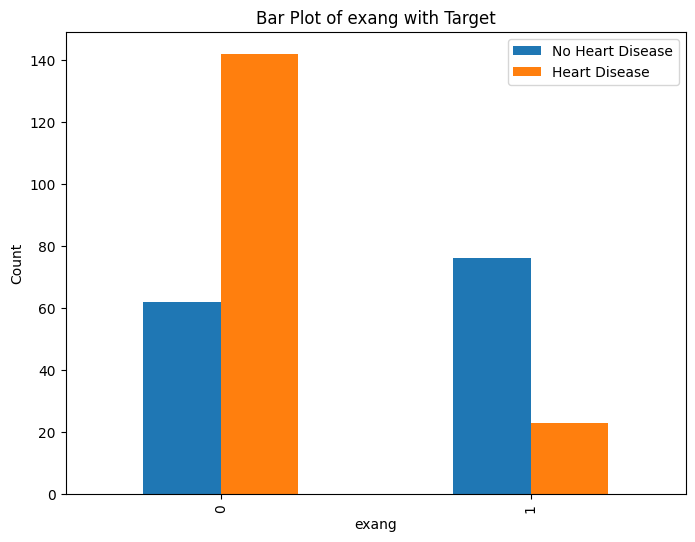

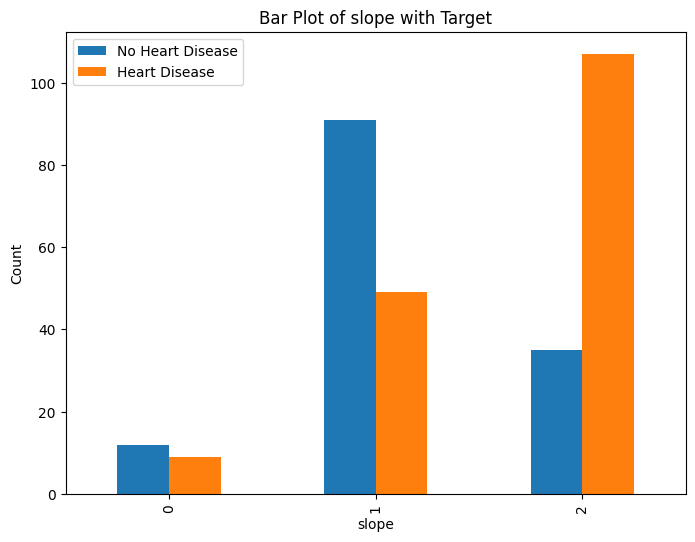

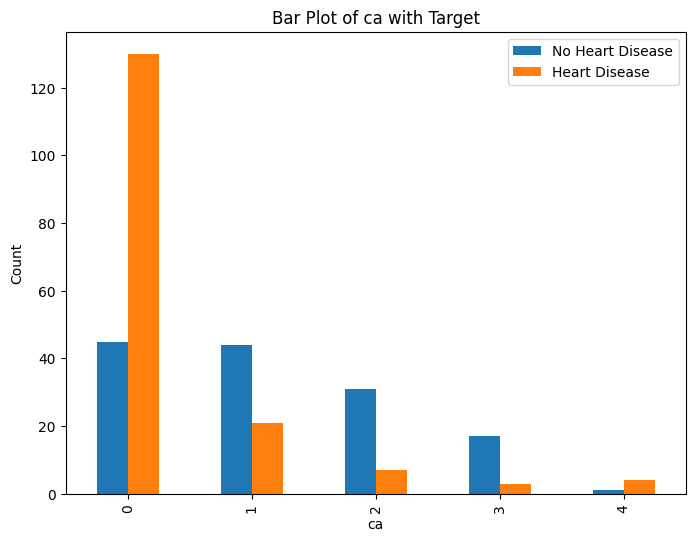

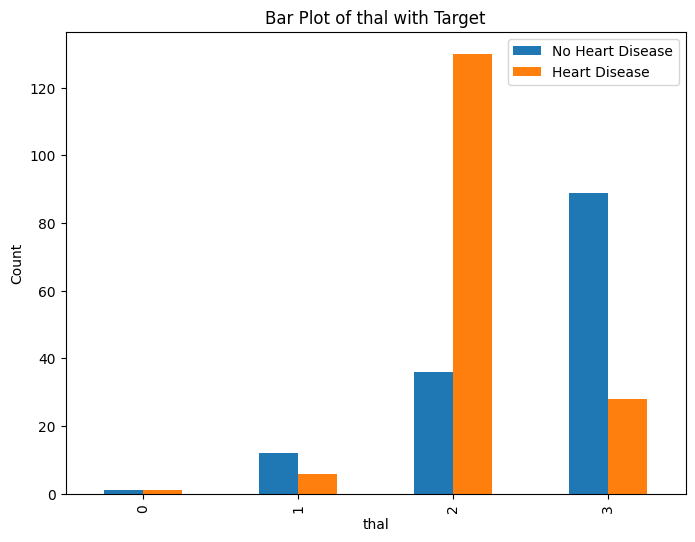

In [ ]:

columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create bar plots for each column
for col in columns:
    # Group data by the column and target
    grouped_data = data.groupby([col, 'target']).size().unstack()

    # Create the bar plot
    grouped_data.plot(kind='bar', figsize=(8, 6))

    # Add title and labels
    plt.title(f'Bar Plot of {col} with Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(['No Heart Disease', 'Heart Disease'])



    # Display the plot
    plt.show()

   age   age_category
0   63            Old
1   37     Mid Adults
2   41  Senior Adults
3   56            Old
4   57            Old


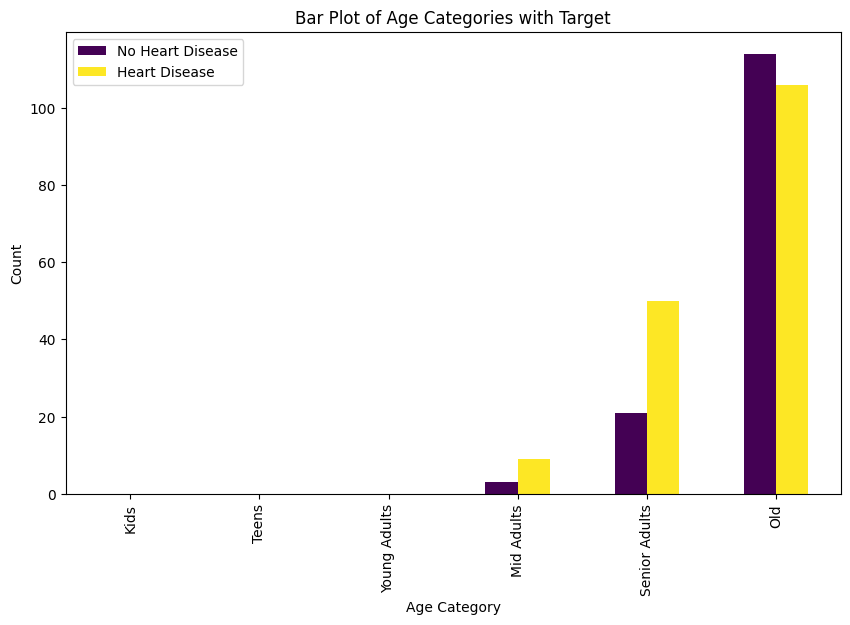

In [ ]:

# Define the age categories and their corresponding labels
bins = [0, 12, 19, 29, 39, 49, 100]  # Age ranges
labels = ['Kids', 'Teens', 'Young Adults', 'Mid Adults', 'Senior Adults', 'Old']

# Add the categorized age column
data['age_category'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Encode 'age_category' into numeric values
data['age_category_encoded'] = data['age_category'].astype('category').cat.codes
# Check the new column
print(data[['age', 'age_category']].head())

# Group by age_category and target
grouped_data = data.groupby(['age_category', 'target']).size().unstack()

# Plot the bar graph
grouped_data.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Add title and labels
plt.title('Bar Plot of Age Categories with Target')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Show legend
plt.legend(['No Heart Disease', 'Heart Disease'])

# Display the plot
#plt.show()


<Axes: xlabel='thal', ylabel='Density'>

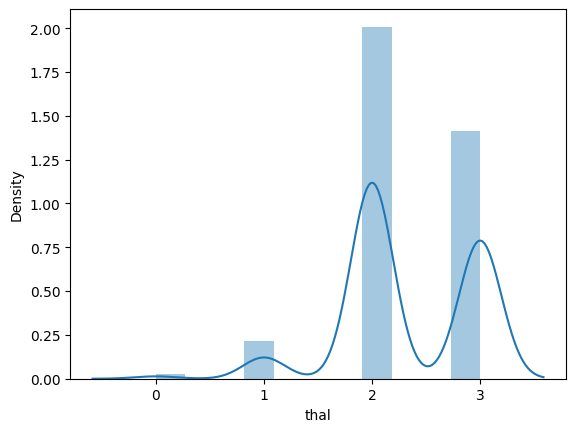

In [ ]:
sns.distplot(data["thal"])

target
1    165
0    138
Name: count, dtype: int64


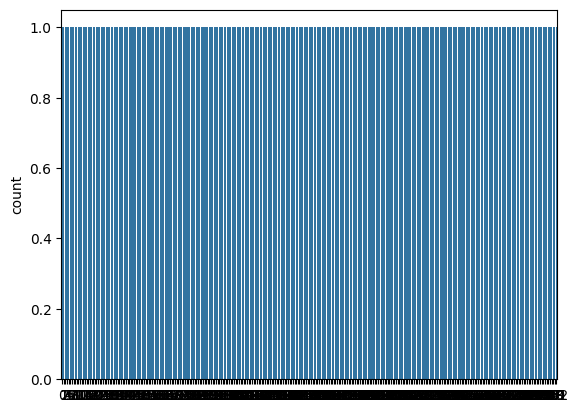

In [ ]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

## **Logistic regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Ensure all other categorical variables are encoded
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # Add any other categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Drop the original 'age_category' and any unnecessary columns
data = data.drop(['age', 'age_category'], axis=1, errors='ignore')

# Define predictors and target
predictors = data.drop("target", axis=1)
target = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)



Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



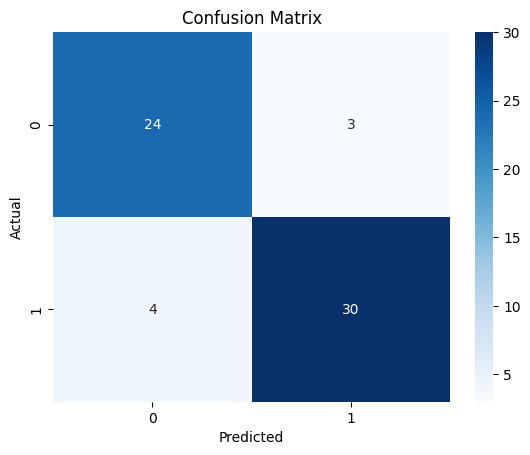

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=588)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
Logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {Logistic_accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print(model.n_iter_)

[329]


# **Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV



In [ ]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],          # Splitting criterion
    'max_depth': [3, 5, 10, None],             # Depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],             # Minimum samples in a leaf
    'max_features': [None, 'sqrt', 'log2'],    # Features considered for best split
}


In [ ]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    verbose=1,           # Show progress
    n_jobs=-1            # Use all processors
)

# Perform the grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best score on training set
print("Best Training Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
Decision_Tree_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", Decision_Tree_accuracy )



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Training Accuracy: 0.7849489795918367
Test Accuracy: 0.7868852459016393


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model evaluation
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {RF_accuracy:.2f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.82


# **Gradient boosting**

In [ ]:
#!pip uninstall -y xgboost scikit-learn
#!pip install xgboost==1.7.6 scikit-learn==1.2.2



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Test Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



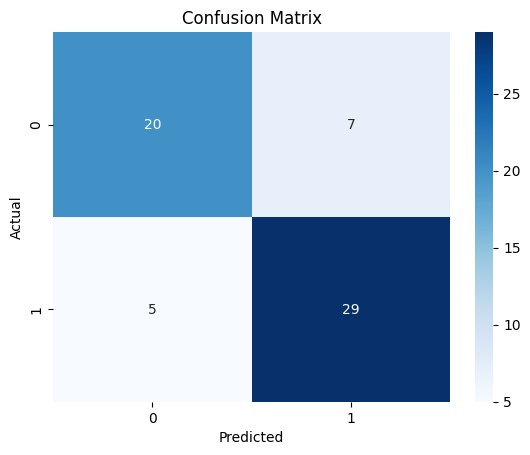

In [ ]:

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, objective='binary:logistic')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Train the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Accuracy
Xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {Xgb_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



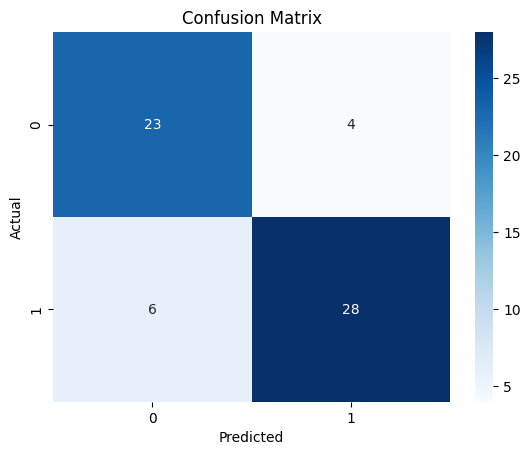

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': ['scale', 'auto']     # Kernel coefficient
}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Train the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {SVM_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Test Accuracy: 0.59


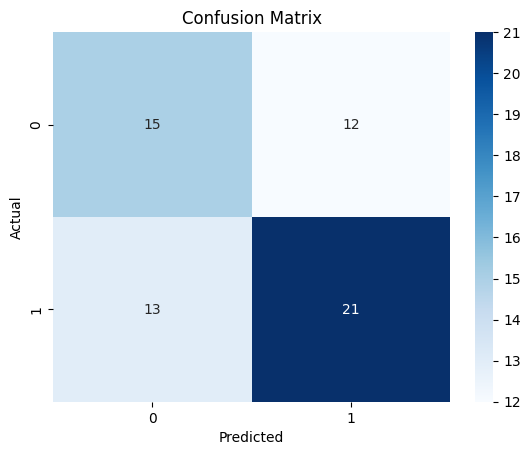

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5)

# Train the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {KNN_accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Performance comparison **

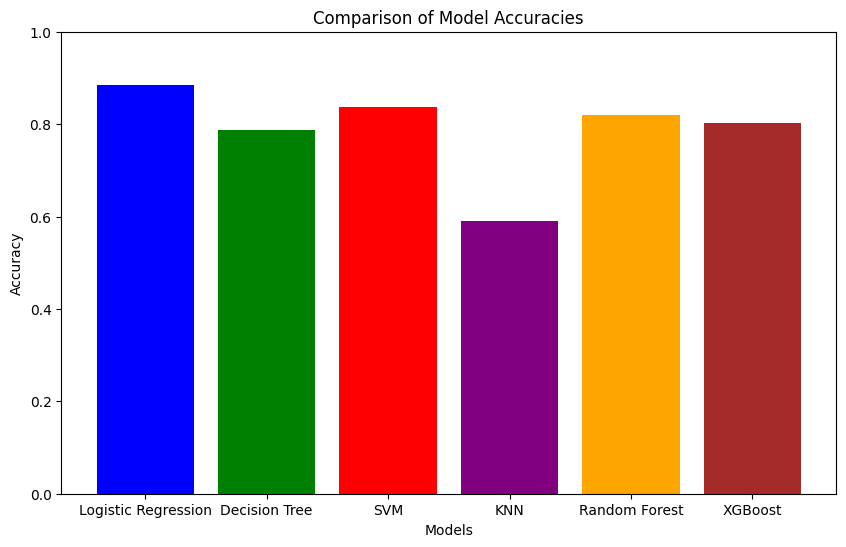

In [ ]:


# Model names and their corresponding accuracies
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 'XGBoost']
accuracies = [Logistic_accuracy, Decision_Tree_accuracy, SVM_accuracy, KNN_accuracy, RF_accuracy, Xgb_accuracy]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1.0])  # Set the limit of y-axis to scale the chart appropriately
plt.show()
